In [146]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import glob
from pathlib import Path

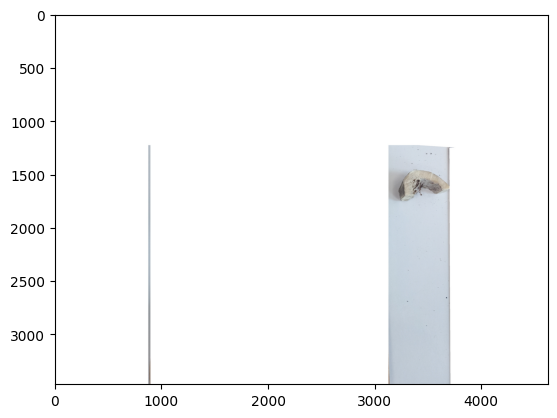

In [147]:
directory = Path("../1")

jpg_files = list(directory.glob("*.jpg")) + list(directory.glob("*.jpeg"))


a = jpg_files[2]

img = cv2.imread(a)




plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

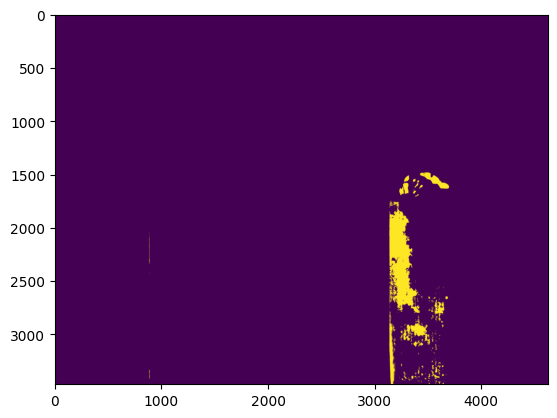

In [148]:
blured = cv2.blur(img, (21,21))
img_hsv = cv2.cvtColor(blured, cv2.COLOR_BGR2HSV) 

mask = cv2.inRange(img_hsv, lowerb=(0, 0, 100),  upperb=(179,25,255))

mask = cv2.bitwise_not(mask)

#mask = cv2.erode(mask, np.ones((21,21)))

plt.imshow(mask)
plt.show()

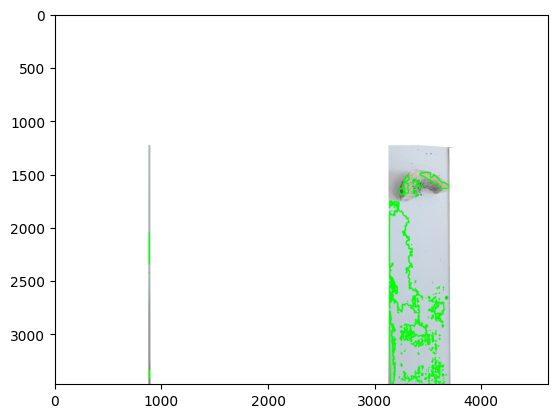

In [149]:
cnt, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
new_img = img.copy()
cv2.drawContours(new_img, cnt, -1, (0,255,0), 10)

plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()

In [150]:
full_image_area = img.shape[0]*img.shape[1] / 5000
areas = list()
new_cnt = list()
print(len(cnt))
for i in cnt:
    area = cv2.contourArea(i)
    if area > full_image_area:
        new_cnt.append(i)
        areas.append(cv2.contourArea(i))

areas = np.array(areas)

710


In [136]:
areas[np.argsort(areas)[::-1]]

array([1.46655745e+07, 1.53544000e+05, 1.71150000e+04, 1.65740000e+04,
       1.35250000e+04, 7.97300000e+03])

In [123]:
np.argsort(areas)[::-1]

array([1, 0])

In [124]:
print(f'number of fragments: {len(new_cnt)}')

number of fragments: 2


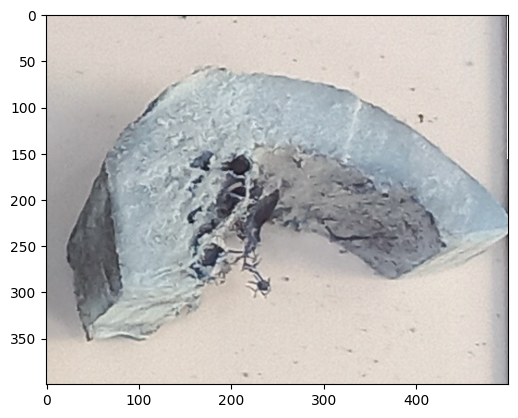

In [125]:
cropped = img[1400:1800, 3200:3700]
#cropped = img[2500:3000, 3800:4000]

plt.imshow(cropped)
plt.show()

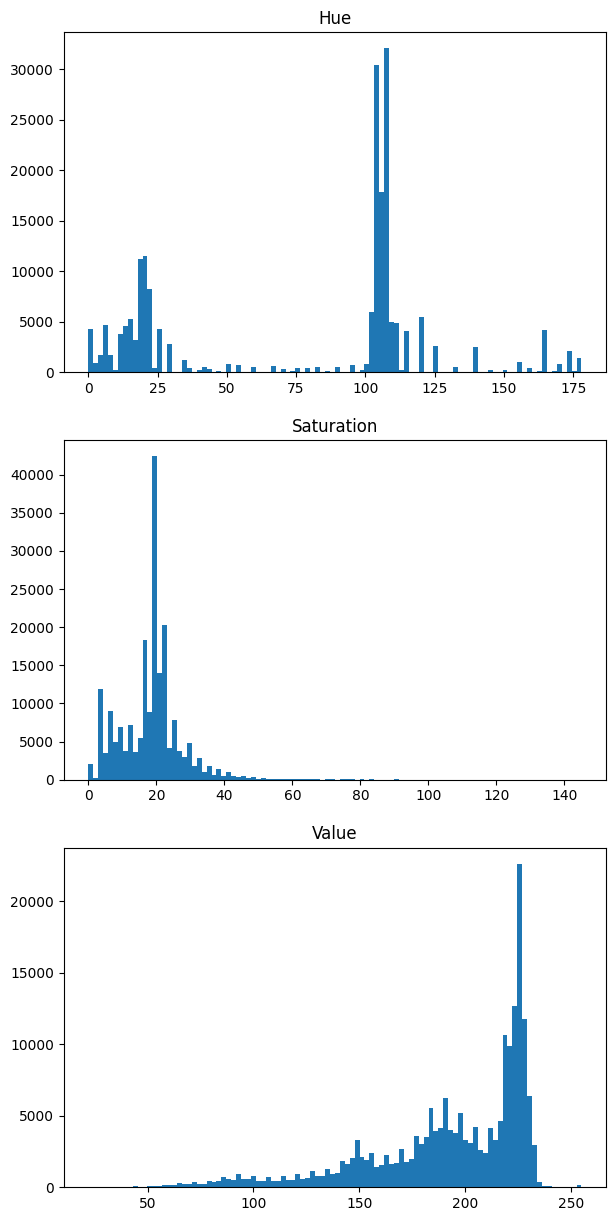

In [115]:
cropped_hsv = cv2.cvtColor(cropped, cv2.COLOR_BGR2HSV)

fig, ax = plt.subplots(3,1, figsize=(7,15))
ax = ax.ravel()
d = dict({0: 'Hue',
          1: 'Saturation',
          2: 'Value'})
for i in range(3):
    ax[i].hist(cropped_hsv[:,:,i].ravel(),bins=100)
    ax[i].set_title(d[i])
    
plt.show()